<a href="https://colab.research.google.com/github/eyecandycoder/Abhishek/blob/main/K_NN%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X= dataset.iloc[: , : -1].values
y = dataset.iloc[: , -1].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5 , metric  = 'minkowski', p =2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


In [24]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision =2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1),)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


**Confusion Matrix**

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55  3]
 [ 1 21]]


0.95

**K-nn on train dataset**

<ipython-input-26-ebfaadfc2497>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)


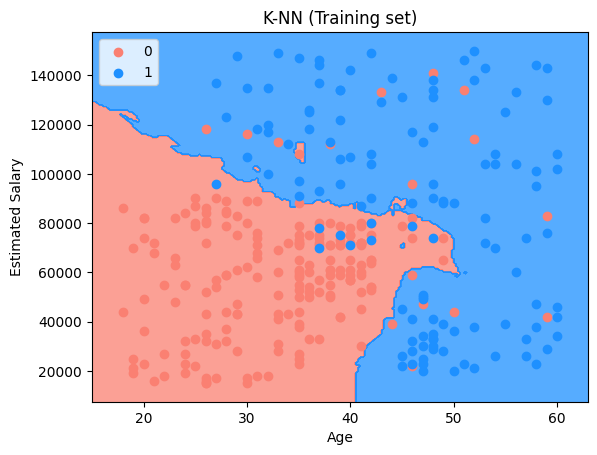

In [26]:
from matplotlib.colors import ListedColormap
h = .02
X0_min, X0_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
X1_min, X1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
plt.contourf(X0_unscaled, X1_unscaled, classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),
             alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_train), y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()


**K- NN on test dataset**

<ipython-input-28-ac493fb1ca91>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)


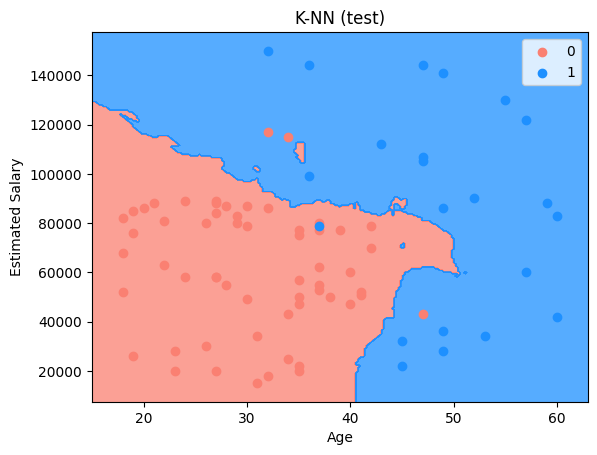

In [28]:
from matplotlib.colors import ListedColormap
h = .02
X0_min, X0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X1_min, X1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
plt.contourf(X0_unscaled, X1_unscaled, classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),
             alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_test), y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("K-NN (test)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
